# Clustering

This notebook follows [clustering exercises](https://machinelearningmastery.com/clustering-algorithms-with-python/) from Jason Brownlee.

Notes:
- Scaling is recommended prior to clustering.
- Depending on algorithm, different things may need to be specified. Either number of clusters or a minimum distance considered to be "close".
- See [scikit-learn's documentation](https://scikit-learn.org/stable/modules/clustering.html) for details on how each algorithm works.

In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


#### Dataset

This is a two-dimensional dataset for easy visualization. It is not representative of the data which will help us to identify clusters in general.

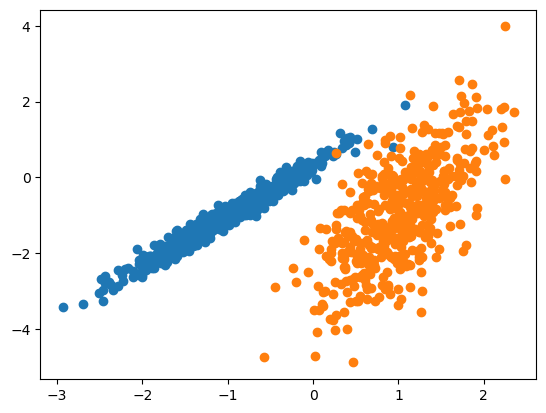

In [2]:
# Imports
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# Define the dataset
X, y = make_classification(n_samples=1000, 
                           n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# Scatter plot for samples from each class
for class_value in range(2):
    # Row indexes for samples with the class
    row_ix = where(y == class_value)
    # Scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# Show plot
pyplot.show()

#### Affinity Clustering

Based on "affinity propagation", which takes as input measure of similarity. Real-valued messages are exchanged until a high-quality set of exemplars and clusters emerge. See [this paper](https://www.science.org/doi/10.1126/science.1136800) for details.

Main Parameters:
- preference: governs how many exemplars are used
- damping factor: damps responsibility and availability messages to avoid numerical oscillations when updating messages.

Time complexity is O(n<sup>2</sup>T), where N is the number of samples and T is the number of iterations.
Memory complexity is O(n<sup>2</sup>)

Two types of messages.
- Responsibility r(i,k) is the accumulated evidence that sample k should be the exemplar for sample i.
- Availability a(i,k) is the accumulated evidence that i should choose k to be the exemplar. Considers values for other samples that k should be an exemplar.

A damping factor lambda is added to avoid numerical oscillations.

Full list of parameters. See [scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html).

- damping=0.5: damping factor to control oscillation. 1 means no damping. Can go from 0.5 to 1.0.
- max_iter=200: Maximum number of iterations. I think it stops earlier than this if it converges?
- convergence_iter=15: Number of iterations with no change at which we stop.
- copy=True: whether the input data is copied.
- preference=None: array of weights (I think it's 1D, size of the number of samples), with higher weights meaning the points are more favored for exemplars.
- affinity='euclidean'. Can be 'euclidean' or 'precomputed'. For 'euclidean', negative squared euclidean distance between points is used for affinity. I'm not sure what 'precomputed' is.
- verbose=False
- random_state=None

In [3]:
# Affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# Define dataset (didn't we do this exact same thing?)
X,_ = make_classification(n_samples=1000, n_features=2, n_informative=2,
                         n_redundant=0, n_clusters_per_class=1, random_state=4)
# Define model
model = AffinityPropagation(damping=0.9, max_iter = 200)
# Fit
model.fit(X)
# Assign cluster to each sample
yhat = model.predict(X)
# Retrieve
clusters = unique(yhat)

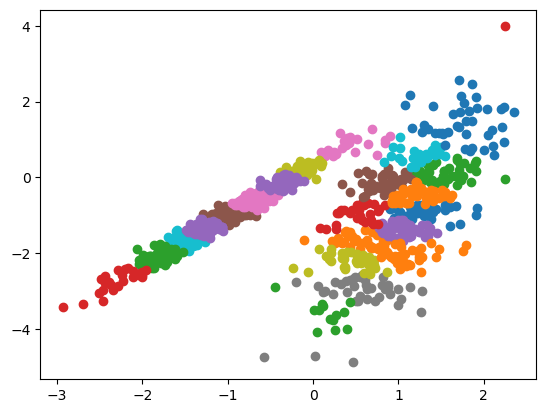

In [4]:
# Scatter plot
for cluster in clusters:
    # Get row indexes
    row_ix = where(yhat==cluster)
    # Create scatter
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
# Show
pyplot.show()

In [5]:
# Some stats about the clusters
import numpy as np
print("There are",len(np.unique(yhat)),"clusters. Their distribution is as follows.")

unique,counts = np.unique(yhat, return_counts=True)
dict(zip(unique, counts))

There are 25 clusters. Their distribution is as follows.


{0: 44,
 1: 37,
 2: 45,
 3: 1,
 4: 51,
 5: 94,
 6: 81,
 7: 37,
 8: 39,
 9: 57,
 10: 16,
 11: 30,
 12: 13,
 13: 28,
 14: 77,
 15: 45,
 16: 27,
 17: 3,
 18: 38,
 19: 25,
 20: 25,
 21: 56,
 22: 56,
 23: 26,
 24: 49}

# Agglomerative Clustering

Based on merging examples until we get the desired number of clusters.

A subset of hierarchical clustering.

Some parameters, from [scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

- ```n_clusters```: how many clusters to make
- ```metric```: what distance metric to use. There are several options. One is ```precomputed```, for which a distance matrix is needed.
- ```linkage```: can be ```ward```, ```complete```, ```average```, or ```single```. Governs linkage criterion for clusters, which set of observations to use to calculate distance.

Note: if ```linkage``` is ward, then ```metric``` must be ```euclidean```.

There are some other parameters; I am not going to list them all.

Maybe I'll try this later, but from the documentation, it looks like if I use ```precomputed``` for ```metric```, then I pass a distance matrix for ```X``` with the ```fit``` method, rather than the set of points.

In [10]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

In [11]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=1, random_state=4)

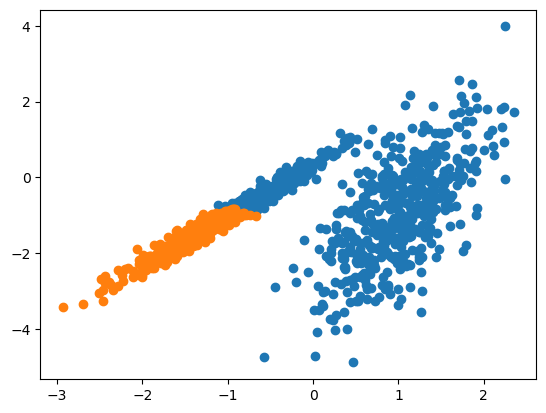

In [44]:
model = AgglomerativeClustering(n_clusters=2)
yhat = model.fit_predict(X)
clusters = unique(yhat) # Unique clusters
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

# BIRCH

Stands for Balanced Iterative Reducing and Clustering using Hierarchies. It is described in [this paper](https://dl.acm.org/doi/10.1145/235968.233324). It is designed for large data sets with an eye to minimizing memory and time, and it is an online algorithm.

It works by building a Clustering Feature Tree for the data. A new sample is interested into the root and when whatever subcluster has the smallest radius after merging, constrained by threshold and branching factor conditions. This is done repeatedly until a leaf is reached.

Explanation [here](https://scikit-learn.org/stable/modules/clustering.html#birch). I'm confused as to some of the details.

MiniBatchKMeans is suggested over BIRCH is ```n_features``` is greater than 20.

(Some) Parameters:

- threshold
- branching_factor
- n_clusters

In [47]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

In [48]:
X,_ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                         n_clusters_per_class=1, random_state=4)

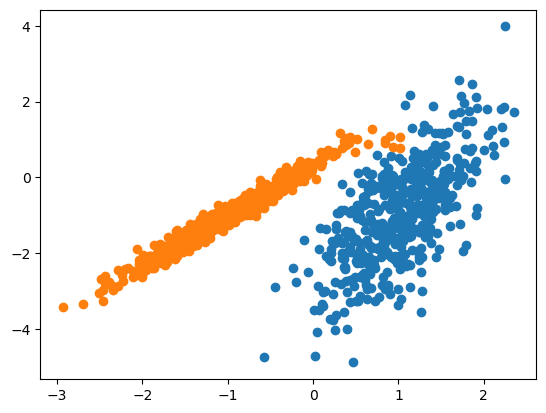

In [55]:
model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)
yhat=model.predict(X)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat==cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

# DBSCAN

Stands for Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for any shape, rather than convex-shaped clusters from k-means.

Core samples are those that have at least ```min_samples``` points with a distance ```eps```. A cluster includes a core sample, all its neighbors (defined as within distance ```eps```) that are core samples, and so on. Neighbors that are within ```eps``` but are not themselves core samples are included and can be thought of as fringe. Depending on the order of input data, fringe points could go into different clusters.

Parameters:
- ```eps```: default 0.5
- ```min_samples```: default 5.
- ```metric```: distance metric. Default ```euclidean```. Can also use ```precomputed```, in which case the input ```X``` is considered to be a distance matrix.
- ```algorithm```: default ```auto```. Algorithm for NearestNeighbors to find nearest neighbors.
- Others

Resources:
- [scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
- [Original Paper](https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD-96.final.frame.pdf)
- [Later Paper](https://dl.acm.org/doi/10.1145/3068335)

In [56]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

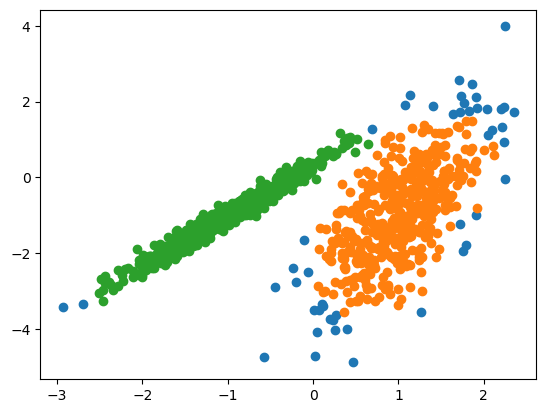

In [66]:
X,_ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,n_clusters_per_class=1,random_state=4)
model = DBSCAN(eps=0.30, min_samples=9)
yhat = model.fit_predict(X)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
pyplot.show()

# k-Means Clustering

Probably the best-known clustering method. Algorithm:

- Start with an initial set of k means
- Assign each point to the cluster with the nearest mean.
- Update: recalculate the means (centroids) for each cluster.
- The algorithm converges when assignments no longer change.

Parameters:
- ```n_clusters```: default 8.
- ```init```: how the initial centroids are chosen. Options are ```k-means++```, ```random```. An array can be passed of shape ```(n_clusters, n_features)```. A callable can be passed that takes arguments ```X, n_clusters``` and a random state and returns an initialization. Default is ```k-means++```.
- ```n_init```: Number of times the algorithm is run with different centroid seeds. Best result by intertia is used. Default is 10.
- ```max_iter```: default 300. Maximium number of iterations for a single run.
- ```algorithm```: ```lloyd, elkan, auto, full```. Default is ```lloyd```.
- Others

In [67]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [68]:
X,_=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4)

C:\Users\micha\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


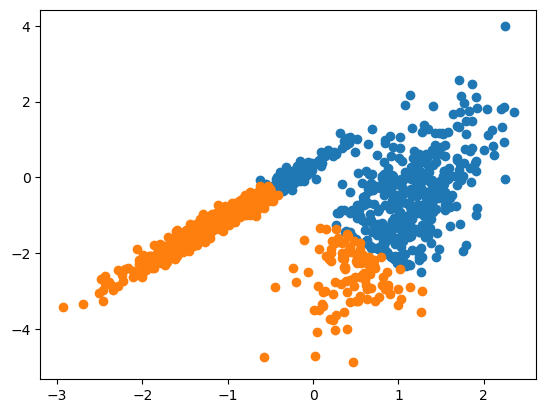

In [70]:
model = KMeans(n_clusters=2, n_init=10)
model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
pyplot.show()

# Mini-Batch K-Means

Like k-means, but it updates cluster centroids based on mini-batches of samples rather than the entire dataset. Perhaps more robust to statistical noise.

Similar parameters as to K-Means, but there is also a ```batch_size``` parameter.

In [71]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot

In [72]:
X,_=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4)

C:\Users\micha\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micha\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


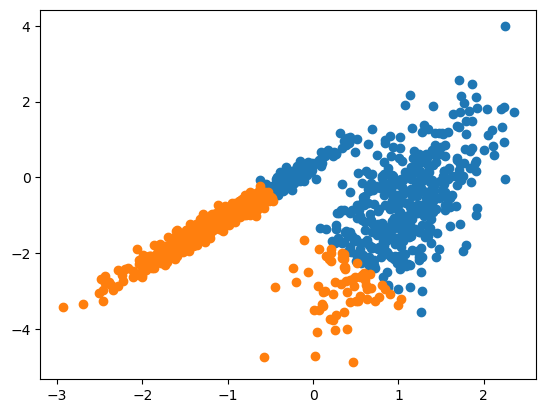

In [74]:
model = MiniBatchKMeans(n_clusters=2)
model.fit(X)
yhat=model.predict(X)
clusters=unique(yhat)
for cluster in clusters:
    row_ix = where(yhat==cluster)
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
pyplot.show()

# Looks like the same result as regular k-means

# Mean Shift

Mean-shift is another centroid-updating algorithm, like k-means. At each iteration, all points are assigned to clusters based on (I think) the nearest centroid.

For the update step, centroids are moved in the direction of the mean of all nearby points.

Not very scalable due to the many nearest-neighbor searches that are required. Convergence is guaranteed.

Resources:
- [scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html#mean-shift)
- [Paper](https://ieeexplore.ieee.org/document/1000236)

Some parameters:
- ```bandwidth```: dictates the size of the region to search through. I think this indirectly governs the number of clusters.
- ```seeds```: to initialize kernels.
- Others

In [75]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot

In [76]:
X,_=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4)

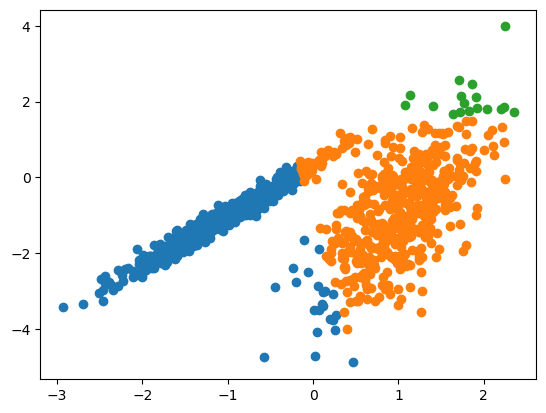

In [77]:
model=MeanShift()
yhat=model.fit_predict(X)
clusters=unique(yhat)
for cluster in clusters:
    row_ix=where(yhat==cluster)
    pyplot.scatter(X[row_ix,0],X[row_ix,1])
pyplot.show()

# OPTICS

Stands for Ordering Points To Identify the Clustering Structure. Similar to DBSCAN. OPTICS includes a reachability graph, which includes a ```reachability_``` distance and a spot within the ```ordering_``` attribute.

Produces an ordering, not an explicit set of clusters. It is better than DBSCAN with detecting clusters in data of varying density.

In [78]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot

In [79]:
X,_=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4)

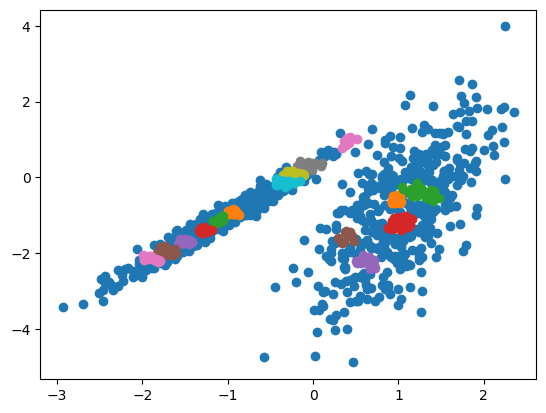

In [80]:
model=OPTICS(eps=0.8, min_samples=10)
yhat=model.fit_predict(X)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat==cluster)
    pyplot.scatter(X[row_ix,0],X[row_ix,1])
pyplot.show()

# Spectral Clustering

See a [2002 paper](https://proceedings.neurips.cc/paper_files/paper/2001/file/801272ee79cfde7fa5960571fee36b9b-Paper.pdf). Spectral clustering uses the spectrum (eigenvalues) to perform dimensional reductin and then clusters in fewer dimensions.

In [81]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot

In [82]:
X,_=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4)

C:\Users\micha\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


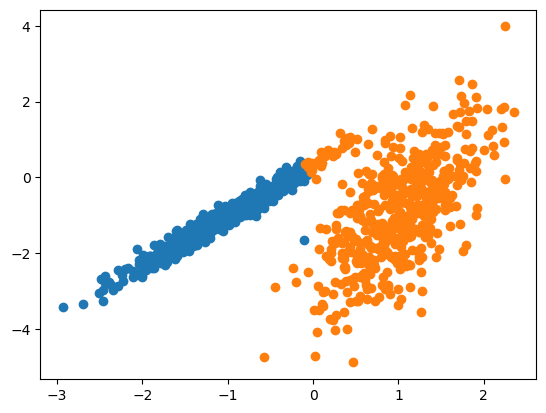

In [83]:
model=SpectralClustering(n_clusters=2)
yhat=model.fit_predict(X)
clusters=unique(yhat)
for cluster in clusters:
    row_ix = where(yhat==cluster)
    pyplot.scatter(X[row_ix,0],X[row_ix,1])
pyplot.show()

# Gaussian Mixture Model

This method assumes that the data is a multivariate probability density function with a mixture of Gaussian probability distributions (i.e. multivariate normal distributions). In this example, since the data is generated synthetically as a mixture of Gaussians, this model performs very well.

In [84]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

In [85]:
X,_ = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=4)

C:\Users\micha\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


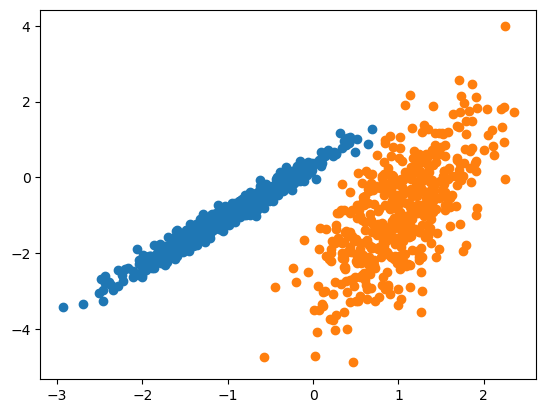

In [88]:
model=GaussianMixture(n_components=2)
model.fit(X)
yhat=model.predict(X)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat==cluster)
    pyplot.scatter(X[row_ix,0],X[row_ix,1])
pyplot.show()